# Deep Learning - **Homework #4**

* Teching assistant email: trung@uef.fi
* Deadline: **23:59 - 14/12/2019 (UPDATED)**
* Maximum: **3 points**

Goals:

* Practice fine-tuning your neural network architecture, depth vs width?
* Understand particle swarm optimization (PSO) algorithm.
* Understand gradient clipping for overcoming gradient exloding, applying it to PSO

References:

1. Razvan Pascanu, Tomas Mikolov, Yoshua Bengio, 2013. [On the difficulty of training Recurrent Neural Networks](https://arxiv.org/abs/1211.5063)
2. Lecun, Y., et al., 1998. [Efficient Backprop](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

How to submit:

* Option#1: **File** $\to$ **Download .ipynb** $\to$ _Send to .ipynb file to my email, or submit it to moodle page_.
* Option#2: **Share** read-only notebook link to my email.
* _If you choose to share the notebook, please re-name the notebook to your student name and student number, I will take the snapshot of your notebook before the deadline, any modification afterward will be disregarded._

**NOTE**: This is official homework and will be graded

In [0]:
%tensorflow_version 2.x
%matplotlib inline
import os
from collections import defaultdict

import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
sns.set()

TensorFlow 2.x selected.


# Question 1: Going 3-D


Finish the implementaiton of `generate_data` function.

We have: $0 \leq x \leq 2\pi$, $x_1 = x$ and 

$
 \begin{cases}
    x_2 = x       & \text{if } \text{ subtract=False}\\
    x_2 = 1 - x   & \text{if } \text{ subtract=True}
  \end{cases} \tag{1}
$

The fucntion returns:

The input data, a 2-D matrix: 

$X=[sin(x_1), cos(x_2)] \tag{2}$

and the output data, a vector: $y = sin(x1) \times cos(x2) \tag{3}$

In [0]:
def generate_data(n=1000, substract=False):
  # TODO

X1, y1 = generate_data(n=1000, substract=False)
X2, y2 = generate_data(n=1000, substract=True)

assert X1.ndim == 2 and X1.shape[1] == 2
assert X2.ndim == 2 and X2.shape[1] == 2

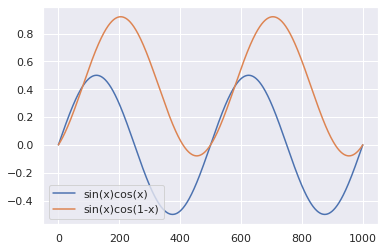

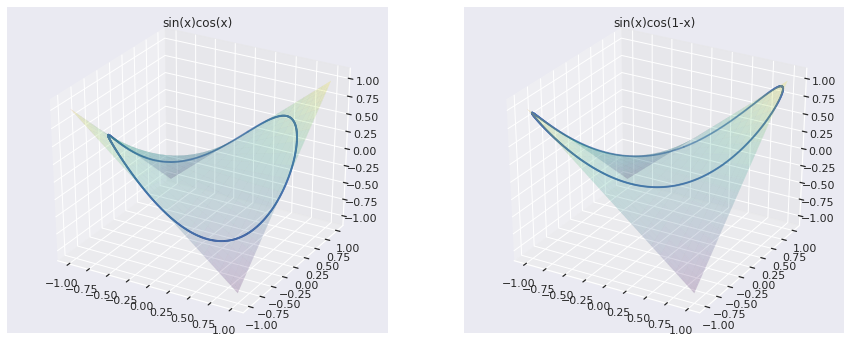

In [0]:
#@title Run this code for debugging the two datasets
plt.figure()
plt.plot(y1, label='sin(x)cos(x)')
plt.plot(y2, label='sin(x)cos(1-x)')
plt.legend()

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x1, x2 = np.meshgrid(X1[:, 0], X1[:, 1])
ax.plot_surface(x1, x2, x1 * x2, alpha=0.05, cmap='viridis', edgecolor='none')
ax.scatter3D(X1[:, 0], X1[:, 1], y1, s=1)
plt.title('sin(x)cos(x)')

ax = fig.add_subplot(1, 2, 2, projection='3d')
x1, x2 = np.meshgrid(X2[:, 0], X2[:, 1])
ax.plot_surface(x1, x2, x1 * x2, alpha=0.05, cmap='viridis', edgecolor='none')
ax.scatter3D(X2[:, 0], X2[:, 1], y2, s=1)
_ = plt.title('sin(x)cos(1-x)')

# Question 2: Neural network fine-tuning, depth vs width

In [0]:
# Split data into training and testing for the two datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.8) # sin(x)*cos(x)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.8) # sin(x)*cos(1-x)

### **a)** Create a `deep` neural network

The network must satisfying the following condition:

* 2 hidden layers
* Training for 100 epoch
* Get mean square error on `X_test1, y_test1` < `0.001`

After finish the training on `X_train1, y_train1`, ploting the learning curves.

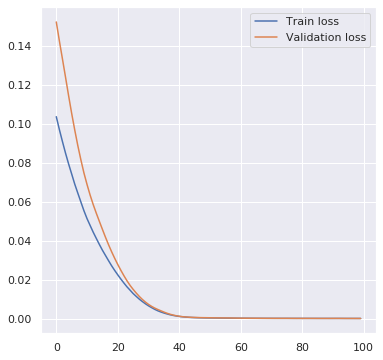

In [0]:
model_deep = # TODO: create the model and train it on X_train1, y_train1

# TODO : after training, ploting the learning curve of model_deep

# making prediction
y_test_pred = model_deep.predict(X_test1)

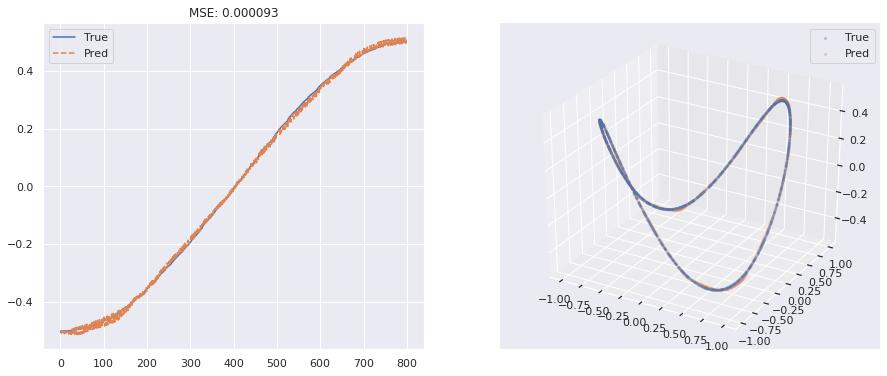

In [0]:
#@title Run the following block the check the performance of your model
y_test_pred = y_test_pred.ravel()
indices = np.argsort(y_test1)
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(1, 2, 1)
plt.plot(y_test1[indices], label='True')
plt.plot(y_test_pred[indices], label='Pred', linestyle='--')
plt.title("MSE: %.6f" % mean_squared_error(y_test1, y_test_pred))
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test1,
             label='True',
             s=4,
             alpha=0.3)
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test_pred.ravel(),
             label='Pred',
             s=4,
             alpha=0.3)
plt.legend()

### **b)** Create a network with only 1 hidden layer, but the same number of parameters as `model_deep`

Train the network with the same configuration as in **a)**, which model is better ?

In [0]:
model_wide = 
# TODO: create a network with only 1 hidden layer but the same number of parameters as model_deep,
# then train it with same configuration as in a), on X_train1, y_train1


print("model_wide: %d parameters" % model_wide.count_params())
print("model_deep: %d parameters" % model_deep.count_params())
assert model_wide.count_params() == model_deep.count_params()

# making prediction
y_test_pred = model_wide.predict(X_test1)

model_wide: 641 parameters
model_deep: 641 parameters


In [0]:
#@title Run this block to debug your models
y_test_pred = y_test_pred.ravel()
indices = np.argsort(y_test1)
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(1, 2, 1)
plt.plot(y_test1[indices], label='True')
plt.plot(y_test_pred[indices], label='Pred', linestyle='--')
plt.title("MSE: %.6f" % mean_squared_error(y_test1, y_test_pred))
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test1,
             label='True',
             s=4,
             alpha=0.3)
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test_pred.ravel(),
             label='Pred',
             s=4,
             alpha=0.3)
plt.legend()

### **c)** Copy the network in **a)** or **b)**, but this time train it on the second dataset (i.e. `X_train2, y_train2`)

Which network perform better in the second dataset?

If the performance is better or worse, could you explain why the model works differently on the second dataset?

In [0]:
model = # TODO: try the model in a) and b), but this time train it on X_train2, y_train2

y_test_pred = model.predict(X_test2)

In [0]:
#@title Run the following block the check the performance of your model
y_test_pred = y_test_pred.ravel()
indices = np.argsort(y_test2)
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(1, 2, 1)
plt.plot(y_test2[indices], label='True')
plt.plot(y_test_pred[indices], label='Pred', linestyle='--')
plt.title("MSE: %.4f" % mean_squared_error(y_test2, y_test_pred))
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X_test2[:, 0],
             X_test2[:, 1],
             y_test2,
             label='True',
             s=4,
             alpha=0.3)
ax.scatter3D(X_test2[:, 0],
             X_test2[:, 1],
             y_test_pred.ravel(),
             label='Pred',
             s=4,
             alpha=0.3)
plt.legend()

# Question 3: Implementing Particle Swarm Optimization

![alt text](https://drive.google.com/uc?export=view&id=1UKMu7j34hEPo4ODYgqNQHlF-s2x1M3Xr)

The above flow chart describes the Particle Swarm Optimization algorithm, use this chart to finish `pso` and `clip_by_norm` function in the following code block

Detail of `clip_by_norm` algorithm could be find in Section 3.2 of [1]

References:

1. Razvan Pascanu, Tomas Mikolov, Yoshua Bengio, 2013. [On the difficulty of training Recurrent Neural Networks](https://arxiv.org/abs/1211.5063)





In [0]:
def clip_by_norm(x, max_norm):
  # x : [swarm_size, n_params]
  # max_norm : a scalar
  # TODO: clipping by norm of the velocity


def pso(model,
        X_train,
        y_train,
        loss_function=tf.losses.mean_squared_error,
        swarm_size=10,
        inertia=0.95,
        local_acceleration=0.1,
        global_acceleration=0.1,
        max_velocity_norm=12,
        num_iters=400):
  r""" NOTE: indeed it is easier to implement PSO or GA in numpy, however,
  it is more important to understand the operation of Tensor in Tensorflow or
  Pytorch.
  Hence, use only tensorflow or pytorch operators and Tensor type for the
  implementation.

  Arguments :
    model : `keras.Model`, model for optimization (the trainable_weights must
      already been initialized!)
    X_train : `[batch_dim, feature_dim]`, input training data
    y_train : `[batch_dim, output_dim]` or `[batch_dim]`, output training data
    loss_function : the loss function with input arguments are `(y_true, y_pred)`
    swarm_size : `int`, the population size of the swarm.
    inertia : `float`, large inertia facilitate global exploration, conversely,
      small inertia encourage local exploration.
    local_acceleration : `float`, could be understand as local learning rate,
      adjusting current speed based on the best personal position.
    global_acceleration : `float`, the global learning rate, adjusting the
      speed base on the best postion of the whole swarm.
    max_velocity_norm : `float`, maximum L2 (a.k.a 'euclidean') norm of the
      speed vector, any particle with larger speed-norm will be clipped to
      the maximum value.
      This value determines the "fineness" of the search region:
      - too high, particles jump past the optimal solutions.
      - too low, particles get stuck at local minima.
    num_iters : `int`, maximum number of iteration
  """
  # ====== Conversion between parameters for PSO and weights of neural network
  shapes = [w.shape for w in model.weights]
  shape_starts = [0] + np.cumsum([np.prod(s) for s in shapes]).tolist()
  weights2params = lambda ws: tf.concat([tf.reshape(w, [-1]) for w in ws],
                                        axis=0)
  params2weights = lambda ps: [
      tf.reshape(ps[start:end], org_shape)
      for start, end, org_shape in zip(shape_starts, shape_starts[1:], shapes)
  ]
  params = weights2params(model.weights)
  n_params = params.shape[0]
  dtype = params.dtype
  # ====== Step 1: Initialize the Swarm
  # TODO

  # ====== Step 2: Run for specified amount of iterations
  for iteration in range(num_iters):
    # ====== Step 3:  Evaluate each particle `p_i`, and update best positions accordingly
    for p_i in range(swarm_size):
      # TODO
    # ====== Step 4: Calculating the acceleration and momentum
    # TODO
    # ====== Step 5: Update the velocity
    # TODO
    # ====== Step 6: Clip the velocity
    swarm_velocity = clip_by_norm(swarm_velocity, max_norm=max_velocity_norm)
    # ======  Step 7: Update positions
    # TODO
    # logging training status
    if (iteration % 20) == 0:
      print("Iter#%d Fitness:%.2f  Velocity:%.2f" %
            (iteration, swarm_best_fitness[best_index].numpy(),
             tf.norm(swarm_velocity).numpy()))
  # ======  Step 8: get the best params and set the model weights
  # TODO
  return model

In [0]:
model = # TODO: pick your best model from Question 2 here
model = pso(model, X_train1, y_train1)
y_test_pred = model.predict(X_test1)

Iter#0 Fitness:-7783.56  Velocity:37.95
Iter#20 Fitness:-0.13  Velocity:13.61
Iter#40 Fitness:-0.13  Velocity:6.57
Iter#60 Fitness:-0.13  Velocity:5.59
Iter#80 Fitness:-0.13  Velocity:4.75
Iter#100 Fitness:-0.13  Velocity:4.31
Iter#120 Fitness:-0.13  Velocity:2.72
Iter#140 Fitness:-0.13  Velocity:2.12
Iter#160 Fitness:-0.13  Velocity:1.23
Iter#180 Fitness:-0.13  Velocity:0.88
Iter#200 Fitness:-0.13  Velocity:0.48
Iter#220 Fitness:-0.13  Velocity:0.25
Iter#240 Fitness:-0.13  Velocity:0.19
Iter#260 Fitness:-0.13  Velocity:0.07
Iter#280 Fitness:-0.13  Velocity:0.03
Iter#300 Fitness:-0.13  Velocity:0.02
Iter#320 Fitness:-0.13  Velocity:0.02
Iter#340 Fitness:-0.13  Velocity:0.01
Iter#360 Fitness:-0.13  Velocity:0.00
Iter#380 Fitness:-0.13  Velocity:0.00


In [0]:
#@title Run this block to check your PSO performance
y_test_pred = y_test_pred.ravel()
indices = np.argsort(y_test1)
plt.figure(figsize=(8, 6))
plt.plot(y_test1[indices], label='True')
plt.plot(y_test_pred[indices], label='Pred', linestyle='--')
plt.title("MSE: %.4f" % mean_squared_error(y_test1, y_test_pred))
plt.legend()

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig=fig)
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test1,
             label='True',
             s=4,
             alpha=0.3)
ax.scatter3D(X_test1[:, 0],
             X_test1[:, 1],
             y_test_pred.ravel(),
             label='Pred',
             s=4,
             alpha=0.3)
plt.legend()